
# Gráficos de entropía

Metamos los gráficos que necesitamos en esta notebook

In [1]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import contrastes
import seaborn as sns


In [5]:

df = contrastes.read_occurrence_dataframe("output/provinces_words.csv", filter_words=True)

/home/jmperez/projects/contrastes/notebooks/contrastes/processing.py:147: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cant_palabras = cant_palabras
/home/jmperez/projects/contrastes/notebooks/contrastes/processing.py:148: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cant_personas = cant_personas


In [6]:
from scipy.stats import entropy

df["entropia_usuarios"] = df[df.cant_personas].apply(entropy, axis=1, raw=True)
df["entropia_palabras"] = df[df.cant_palabras].apply(entropy, axis=1, raw=True)

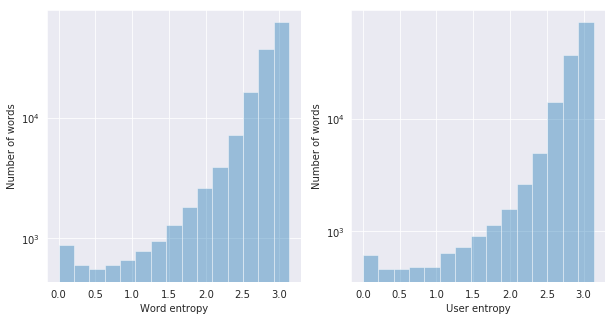

In [7]:
plt.rcParams["figure.figsize"] = (10,5)

sns.set_style("dark")

fig = plt.figure()
plt.subplot(1, 2, 1)

g = sns.distplot(df["entropia_palabras"], bins=15, kde=False)
g.semilogy()
g.set_xlabel("Word entropy")
g.set_ylabel("Number of words")
g.grid(True)

plt.subplot(1, 2, 2)
g = sns.distplot(df["entropia_usuarios"], bins=15, kde=False)
g.semilogy()
g.set_xlabel("User entropy")
g.set_ylabel("Number of words")
g.grid(True)



In [8]:
fig.savefig("../output/figures/entropies.png", bbox_inches='tight')

# Gráficos de Entropía + Posición 

In [9]:
from contrastes.lists import add_info

add_info(df)


df["norm_palabra"] = np.log(df.cant_palabra)
df["norm_palabra"] /= df["norm_palabra"].max()

df["norm_personas"] = np.log(df.cant_usuarios)
df["norm_personas"] /= df["norm_personas"].max()

df["log_rank_personas"] = np.log(df.rank_personas)

df["log_rank_palabras"] = np.log(df.rank_palabras)

Calculating information values...
Calculating ranks...
Adding fnorms...


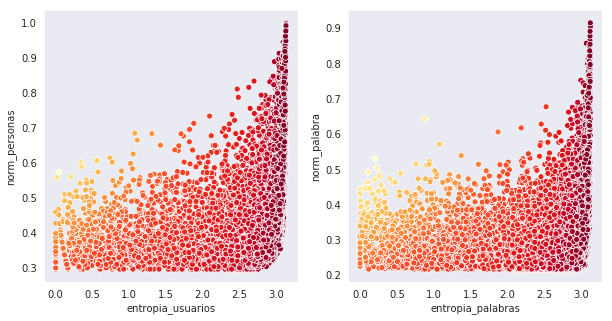

In [10]:
plt.rcParams["figure.figsize"] = (10,5)


f, axes = plt.subplots(1,2)

sample_df = df.sample(frac=.25)

sns.scatterplot(y="norm_personas", x="entropia_usuarios", data=sample_df,
                hue="log_rank_personas", palette="YlOrRd", legend=False, ax=axes[0])

#axes[0].set_xlabel("User Entropy")
#axes[0].set_ylabel("norm. log frequency")


sns.scatterplot(y="norm_palabra", x="entropia_palabras", data=sample_df,
                hue="log_rank_palabras", palette="YlOrRd", legend=False, ax=axes[1])

#axes[1].set_xlabel("Word Entropy")
#axes[1].set_ylabel("Norm. log frequency")




sns.palplot(sns.color_palette("YlOrRd", 12))

In [11]:
f.savefig("../output/figures/entropy_log_rank.png")